In [ ]:
#1. import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load dataset harga komoditas beras
import pandas as pd
data_preprocessing = pd.read_csv('data_harga_beras.csv')

In [ ]:
#Menampilkan dataset awal
show_dataset = ['Tanggal', 'Premium','Medium']
show_dataset = data_preprocessing[show_dataset]
show_dataset.sample(10)

,Tanggal,Premium,Medium
1376,06/12/2024,14750.0,13500.0
396,01/04/2022,12500.0,11000.0
1186,30/05/2024,15750.0,14750.0
197,14/09/2021,12500.0,11000.0
1400,30/12/2024,NaN,NaN
360,24/02/2022,12500.0,11000.0
647,08/12/2022,12500.0,11000.0
1022,18/12/2023,15000.0,12500.0
839,18/06/2023,13000.0,11500.0
1468,08/03/2025,15500.0,14000.0


In [ ]:
#Menampilkan ringkasan dataset
data_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  1573 non-null   object 
 1   Premium  1386 non-null   float64
 2   Medium   1386 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.0+ KB


In [ ]:
#Ubah 'Tanggal' menjadi tipe datetime
data_preprocessing['Tanggal'] = pd.to_datetime(data_preprocessing['Tanggal'], format='%d/%m/%Y')

#Tampilkan informasi dan jenis data FINAL
print("--- Jenis Data Final (Siap untuk Analisis) ---")
data_preprocessing.info()

--- Jenis Data Final (Siap untuk Analisis) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1573 non-null   datetime64[ns]
 1   Premium  1386 non-null   float64       
 2   Medium   1386 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.0 KB


In [ ]:
#Mengecek dan Menghapus Duplikasi Data
#Menghitung jumlah baris duplikat sebelum dihapus
jumlah_duplikat_sebelum = data_preprocessing.duplicated().sum()
print(f"Jumlah baris data duplikat sebelum dihapus: {jumlah_duplikat_sebelum}")

# Menghapus baris data yang terduplikasi
data_bersih = data_preprocessing.drop_duplicates()

# Menampilkan informasi dataframe yang sudah bersih
print("\n--- Informasi Data Setelah Duplikasi Dihapus ---")
data_bersih.info()

# Menghitung jumlah baris duplikat setelah dihapus (untuk verifikasi)
jumlah_duplikat_setelah = data_bersih.duplicated().sum()
print(f"Jumlah baris data duplikat setelah dihapus: {jumlah_duplikat_setelah}")

Jumlah baris data duplikat sebelum dihapus: 0

--- Informasi Data Setelah Duplikasi Dihapus ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1573 non-null   datetime64[ns]
 1   Premium  1386 non-null   float64       
 2   Medium   1386 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.0 KB
Jumlah baris data duplikat setelah dihapus: 0


Text(0.5, 1.0, 'Sebelum Imputasi Data Beras Premium')

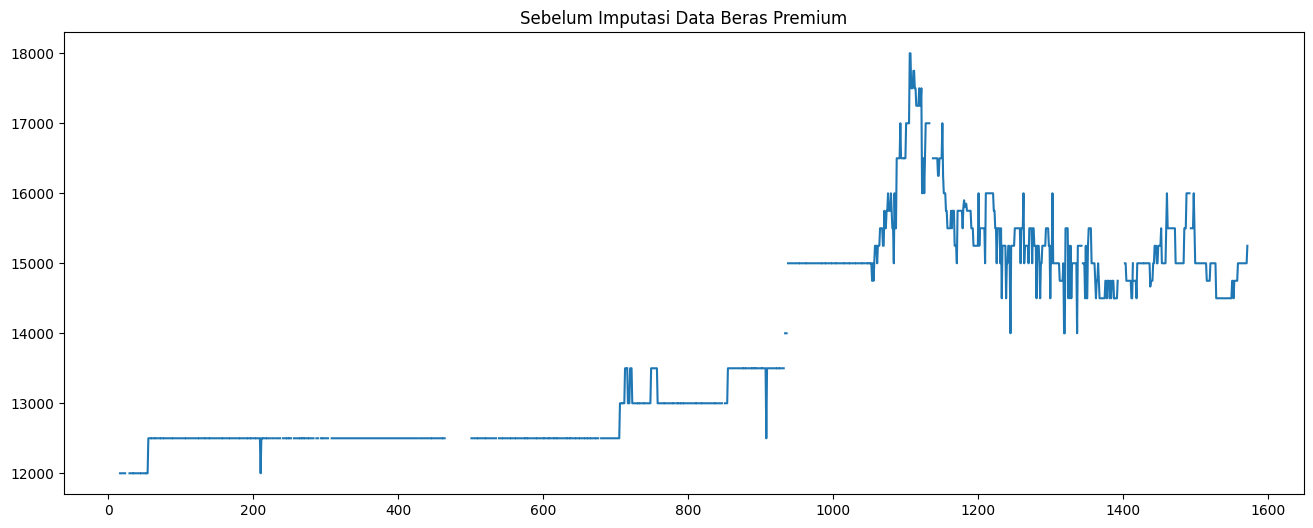

In [ ]:
data_bersih['Premium'].plot(figsize=(16,6))
plt.title('Sebelum Imputasi Data Beras Premium')

Text(0.5, 1.0, 'Sebelum Imputasi Data Beras Medium')

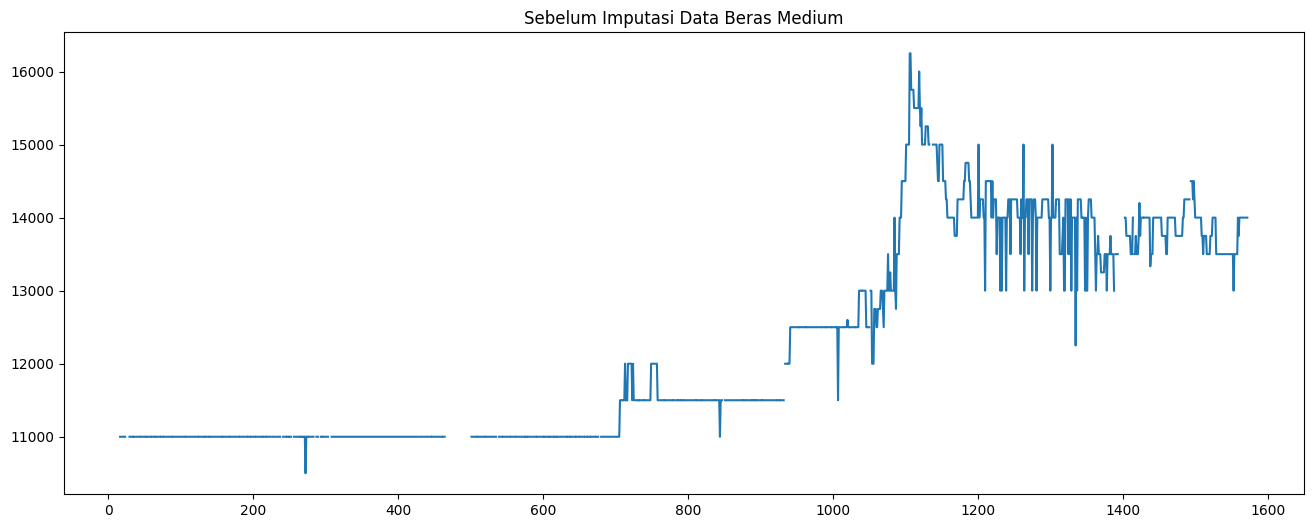

In [ ]:
data_bersih['Medium'].plot(figsize=(16,6))
plt.title('Sebelum Imputasi Data Beras Medium')

In [ ]:
#Imputasi Missing Values dengan Median Periode Bulanan
#Salin dataframe agar data asli tetap utuh
data_imputasi = data_bersih.copy()

#Tampilkan jumlah missing values SEBELUM imputasi
print("--- Jumlah Missing Values SEBELUM Imputasi ---")
print(data_imputasi.isnull().sum())

#Tentukan kolom yang akan diimputasi
kolom_imputasi = ['Premium', 'Medium']

#Lakukan perulangan untuk setiap kolom yang ingin diimputasi
for col in kolom_imputasi:
    #1. Hitung median bulanan menggunakan groupby() pada periode bulan ('M') dan transform()
    #transform() akan menghasilkan Series dengan indeks yang sama seperti dataframe asli,
    median_bulanan = data_imputasi.groupby(data_imputasi['Tanggal'].dt.to_period('M'))[col].transform('median')

    #2. Isi missing values (NaN) dengan nilai median bulanan yang sesuai
    data_imputasi[col].fillna(median_bulanan, inplace=True)

#Tampilkan info dan contoh data hasil imputasi
print("\n--- Informasi Data Setelah Imputasi ---")
data_imputasi.info()

#Tampilkan jumlah missing values SETELAH imputasi untuk verifikasi
print("\n--- Jumlah Missing Values SETELAH Imputasi ---")
print(data_imputasi.isnull().sum())

--- Jumlah Missing Values SEBELUM Imputasi ---
Tanggal      0
Premium    187
Medium     187
dtype: int64

--- Informasi Data Setelah Imputasi ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1573 non-null   datetime64[ns]
 1   Premium  1573 non-null   float64       
 2   Medium   1573 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.0 KB

--- Jumlah Missing Values SETELAH Imputasi ---
Tanggal    0
Premium    0
Medium     0
dtype: int64


/tmp/ipython-input-17-3330526231.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_imputasi[col].fillna(median_bulanan, inplace=True)


Text(0.5, 1.0, 'Setelah Imputasi Data Beras Premium')

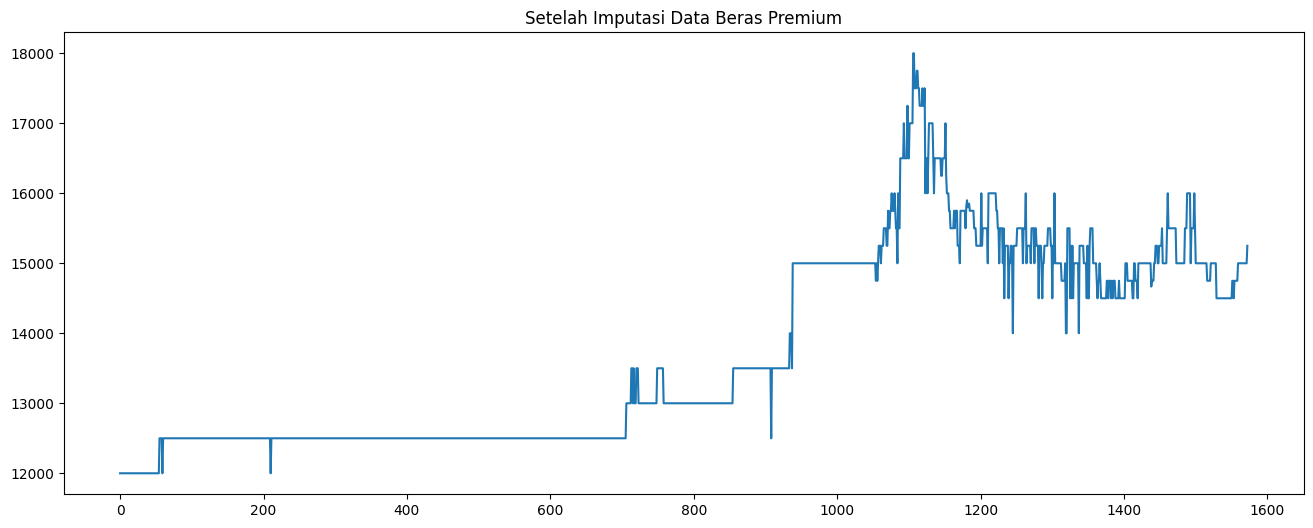

In [ ]:
data_imputasi['Premium'].plot(figsize=(16,6))
plt.title('Setelah Imputasi Data Beras Premium')

Text(0.5, 1.0, 'Setelah Imputasi Data Beras Medium')

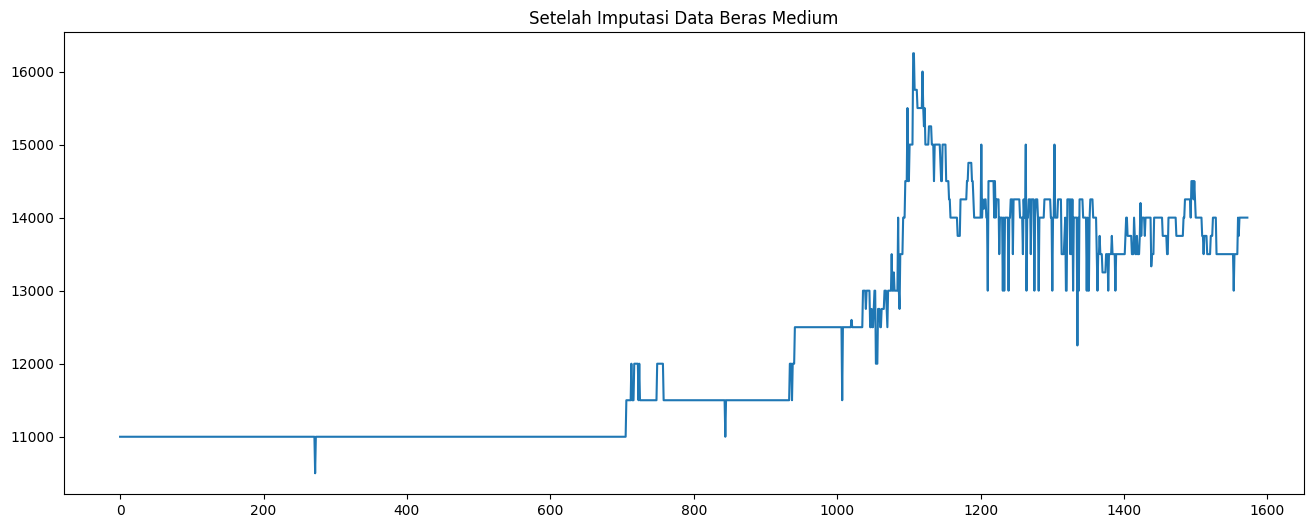

In [ ]:
data_imputasi['Medium'].plot(figsize=(16,6))
plt.title('Setelah Imputasi Data Beras Medium')

In [ ]:
# Dengan baris yang ini
data_imputasi.to_csv("dataset_beras_lstm.csv", index=False)